In [49]:
from pandas.io.json import json_normalize
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load sample commits data
Data randomly sampled using gshuf in command line.

In [11]:
filename = 'data/small_commits'

In [12]:
data = []
for line in open(filename, 'r'):
    data.append(json.loads(line))

In [78]:
# Use pandas json_normalize to load json nested dicts
df = json_normalize(data)

In [79]:
# Rename columns names in snake case
df.columns = map(lambda x: x.replace('.', '_'), list(df.columns.values))

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 19 columns):
author_date            25000 non-null object
author_email           25000 non-null object
author_name            25000 non-null object
author_time_sec        25000 non-null object
author_tz_offset       25000 non-null object
commit                 25000 non-null object
committer_date         25000 non-null object
committer_email        25000 non-null object
committer_name         25000 non-null object
committer_time_sec     25000 non-null object
committer_tz_offset    25000 non-null object
difference             25000 non-null object
encoding               9 non-null object
message                25000 non-null object
parent                 25000 non-null object
repo_name              25000 non-null object
subject                25000 non-null object
trailer                25000 non-null object
tree                   25000 non-null object
dtypes: object(19)
memory usage: 3.6+ MB

In [81]:
df.drop(['encoding', 'author_time_sec', 'committer_time_sec'], axis=1, inplace=True)

In [127]:
df.head()

,author_date,author_email,author_name,author_tz_offset,commit,committer_date,committer_email,committer_name,committer_tz_offset,difference,message,parent,repo_name,subject,trailer,tree,author_timestamp,committer_timestamp,author_month,author_year
0,2005-06-14,88d6e7d6cb0b10e38973adfc5cf30bb8f69dc3bc@aglu....,Thomas Hood,-420,92c6dc59b7c1ca514021502c7eef53b9f2c738fd,2005-06-14,69652caca27c8b940640ad396ab71f93cacec34f@ppc97...,Linus Torvalds,-420,"[{u'new_path': u'arch/i386/kernel/apm.c', u'ne...",[PATCH] apm.c: ignore_normal_resume is set a b...,[223230e78900e5f0be984f7697cb9bf172d71a35],torvalds/linux,[PATCH] apm.c: ignore_normal_resume is set a b...,"[{u'key': u'Signed-off-by', u'value': u'Thomas...",18b82203c75979094e089e4feed1f825fa326c07,2005-06-14 05:58:04,2005-06-14 14:19:35,6,2005
1,2010-07-02,546b05909706652891a87f7bfe385ae147f61f91@kerne...,Tejun Heo,120,ad72cf9885c536e3adae03f8337557ac9dd1e4bb,2010-07-02,546b05909706652891a87f7bfe385ae147f61f91@kerne...,Tejun Heo,120,"[{u'new_path': u'drivers/ata/libata-core.c', u...",libata: take advantage of cmwq and remove conc...,[d313dd85ad846bc768d58e9ceb28588f917f4c9a],torvalds/linux,libata: take advantage of cmwq and remove conc...,"[{u'key': u'Signed-off-by', u'value': u'Tejun ...",e93af7f241987ffe365792c0130d182b0ac890d1,2010-07-02 08:03:52,2010-07-02 08:59:24,7,2010
2,2006-09-27,4ce7f5f96d113d3cf338520688d28b9a1aabc891@earth...,Michal Ostrowski,-420,c9aa6895371b2a257401f59d3393c9f7ac5a8698,2006-09-29,fe08d3c717adf2ae63592e4c9aec6e3e404d8e3e@sunse...,David S. Miller,-420,"[{u'new_path': u'drivers/net/pppoe.c', u'new_s...",[PPPOE]: Advertise PPPoE MTU\n\nPPPoE must adv...,[1533d382155ee888d9621391c108ffb7a68bb25d],torvalds/linux,[PPPOE]: Advertise PPPoE MTU,"[{u'key': u'Signed-off-by', u'value': u'Michal...",1ee6813a6db0e4d1b7f77e8c002e37bc9411a420,2006-09-27 23:11:25,2006-09-29 01:01:44,9,2006
3,2012-02-03,7323a5431d1c31072983a6a5bf23745b655ddf59@chaos...,Jesper Juhl,60,4b2453114f770fe6b2fe5c191f9a1539f52ce2ce,2012-02-03,ed58f755cc8caaf10c3e8c731a8b86fb8f13d6cb@suse.cz,Jiri Kosina,60,[{u'new_path': u'drivers/gpu/drm/gma500/psb_in...,"gma500, lvds: Fix use after free and mem leak ...",[972c5ae961d6e5103e2b33d935cfa4145fd47140],torvalds/linux,"gma500, lvds: Fix use after free and mem leak ...","[{u'key': u'Signed-off-by', u'value': u'Jesper...",b920c04e35b6a1c3f0176552433feebbd743d031,2012-02-03 22:14:19,2012-02-03 22:14:23,2,2012
4,2014-10-23,b6995d21b003a1fed757f1d44a2f50ace4051288@gmail...,Jiayi Ye,480,7424a0609063826a60a933ace872a1e747dfeede,2014-10-27,4645f7897fd33786a2ee1264d590b3c400559d85@linux...,Greg Kroah-Hartman,480,[{u'new_path': u'drivers/staging/rtl8188eu/cor...,staging: rtl8188eu: core: fix null dereference...,[861374fcf3e88e290b026fbddf7b5b27898df4b6],torvalds/linux,staging: rtl8188eu: core: fix null dereference...,"[{u'key': u'Signed-off-by', u'value': u'Jiayi ...",68ee154a4d57734c2c023a3fc0576abc5ac72e08,2014-10-23 14:05:10,2014-10-27 02:33:05,10,2014


# Convert dates

In [82]:
# Convert timestamps
df['author_timestamp'] = pd.to_datetime(df['author_date'])
df['committer_timestamp'] = pd.to_datetime(df['committer_date'])

# Trim dates
df['author_date'] = pd.DatetimeIndex(df['author_timestamp']).normalize()
df['committer_date'] = pd.DatetimeIndex(df['committer_timestamp']).normalize()

# Extract author month and year
df['author_month'] = df['author_date'].dt.month
df['author_year'] = df['author_date'].dt.year

# Commit dates vs. Author dates
There is a shift but no change in trend.

In [100]:
df2 = df.set_index('author_date')

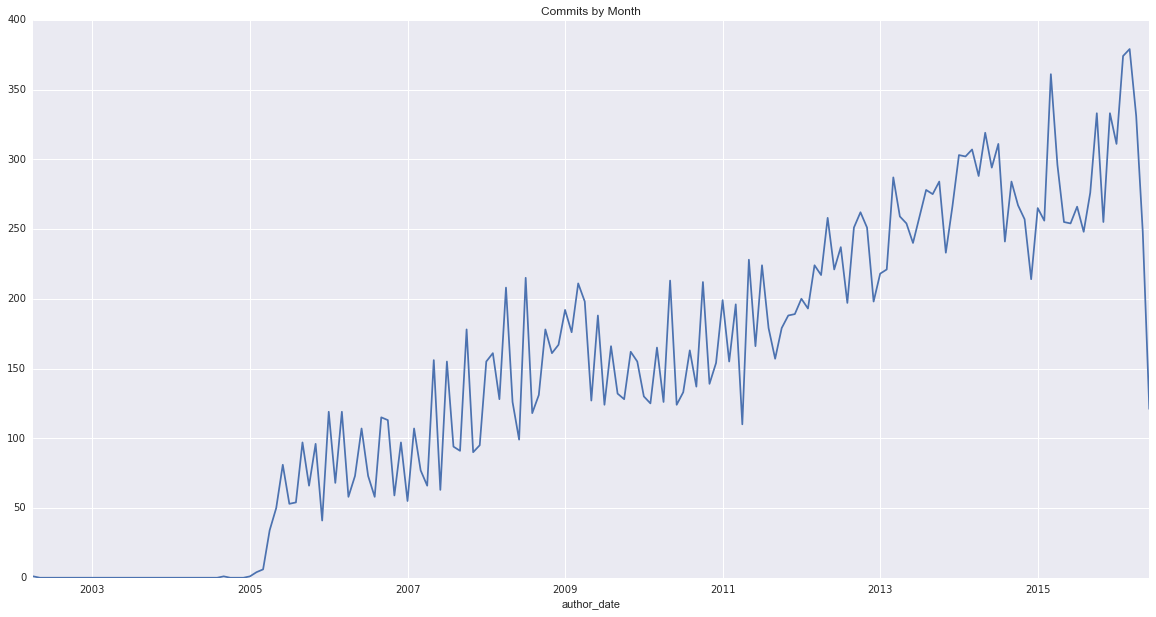

In [117]:
plt.figure(figsize=(20,10))
df2['commit'].resample('MS').apply(len).plot(kind='line')
plt.title('Commits by Month')
plt.show()

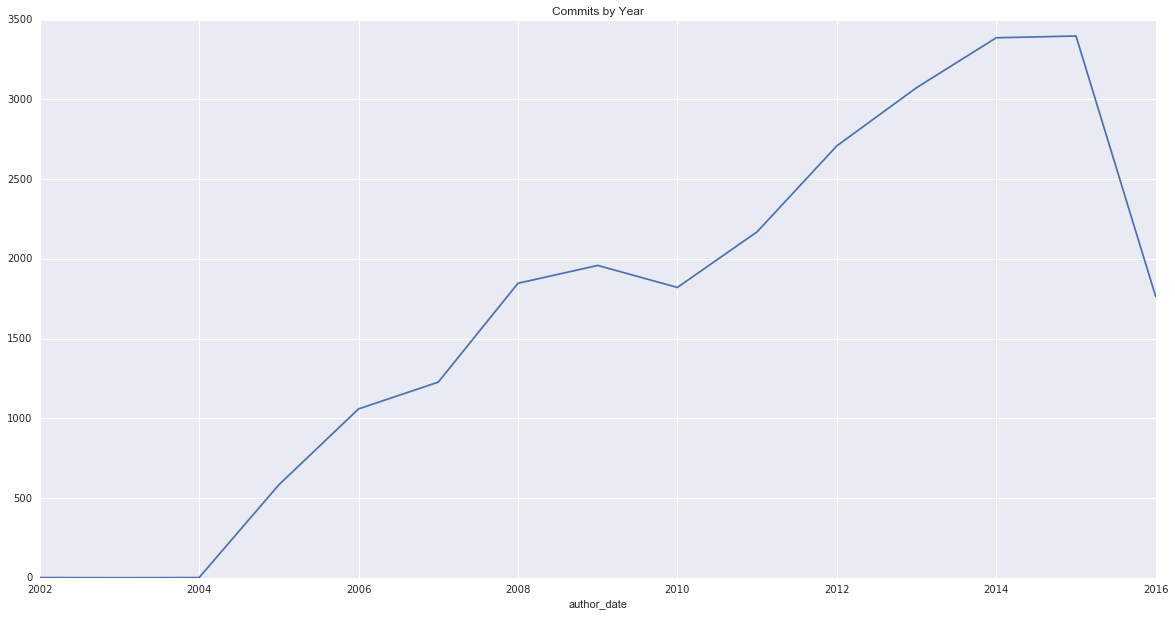

In [116]:
plt.figure(figsize=(20,10))
df2['commit'].resample('AS').apply(len).plot(kind='line')
plt.title('Commits by Year')
plt.show()

In [113]:
df3 = df.set_index('committer_date')

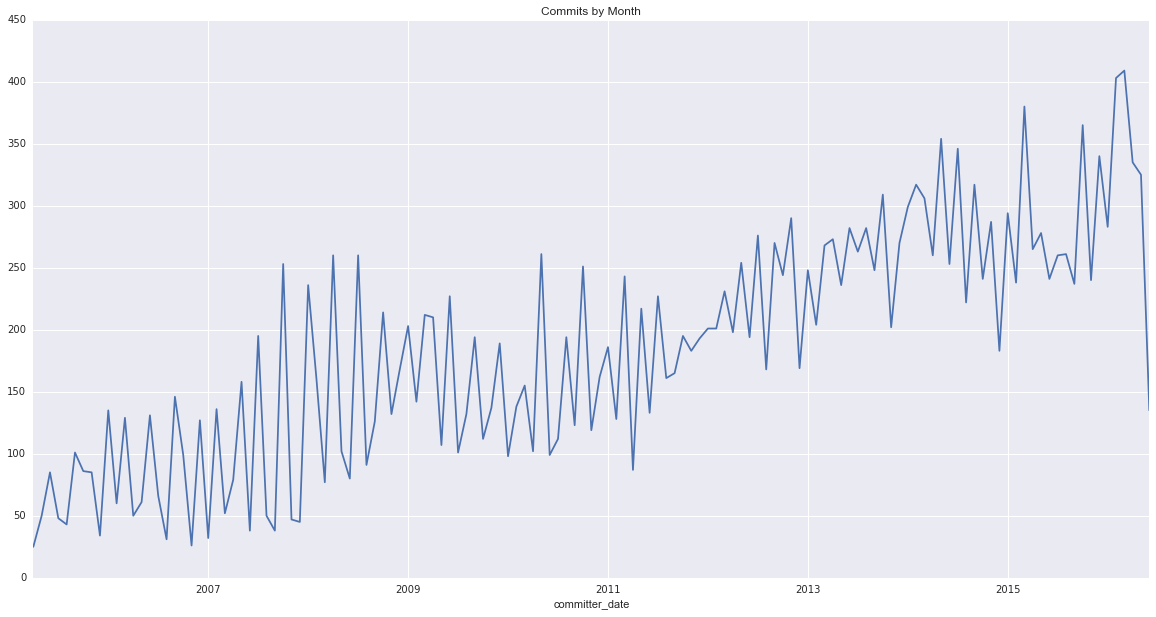

In [115]:
plt.figure(figsize=(20,10))
df3['commit'].resample('MS').apply(len).plot(kind='line')
plt.title('Commits by Month')
plt.show()

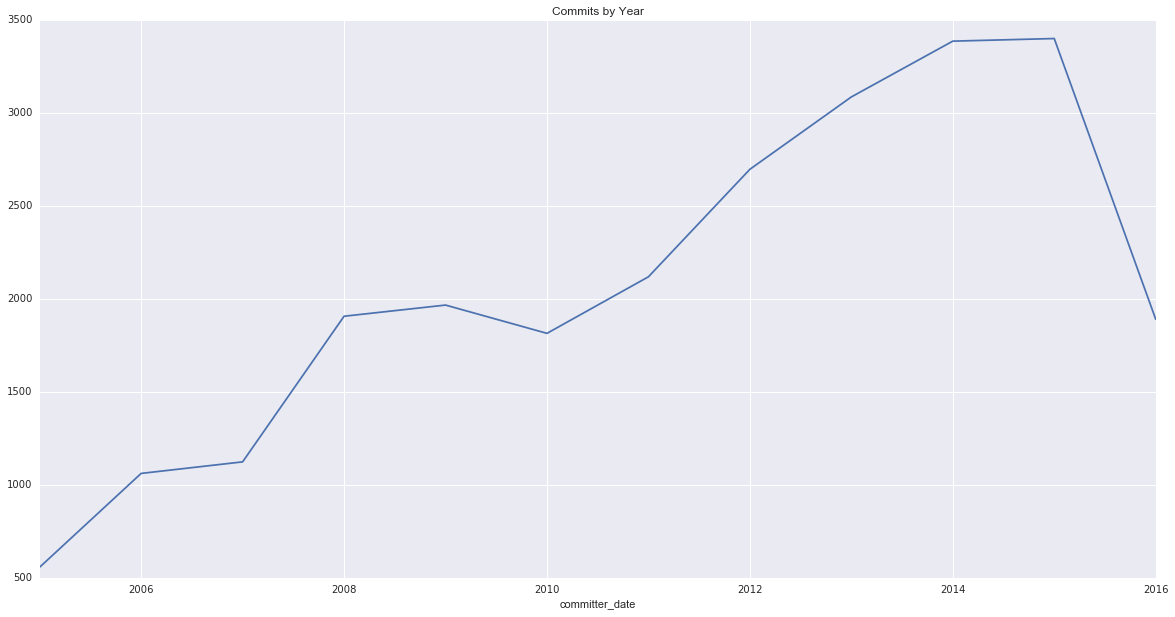

In [121]:
plt.figure(figsize=(20,10))
df3['commit'].resample('AS').apply(len).plot(kind='line')
plt.title('Commits by Year')
plt.show()

In [73]:
print df['author_date'].min()
print df['author_date'].max()

2002-04-09 00:00:00
2016-06-22 00:00:00


In [74]:
print df['committer_date'].min()
print df['committer_date'].max()

2005-04-16 00:00:00
2016-06-22 00:00:00


In [75]:
# Person with the earliest author date
df[df['author_date']==df['author_date'].min()]

,author_date,author_email,author_name,author_tz_offset,commit,committer_date,committer_email,committer_name,committer_tz_offset,difference,message,parent,repo_name,subject,trailer,tree,author_timestamp,committer_timestamp
15535,2002-04-09,4645f7897fd33786a2ee1264d590b3c400559d85@suse.de,Greg Kroah-Hartman,-420,0f64478cbc7a008fe7b7e9ae79a73d8a6904ead8,2006-10-17,4645f7897fd33786a2ee1264d590b3c400559d85@suse.de,Greg Kroah-Hartman,-420,"[{u'new_path': u'drivers/usb/serial/Kconfig', ...",USB: add USB serial mos7720 driver\n\nAdd supp...,[9fcde235270e6783600d1aee5bcda78c8282bcdd],torvalds/linux,USB: add USB serial mos7720 driver,"[{u'key': u'Cc', u'value': u'VijayaKumar <2260...",ce55416f6efd38a7383e99e843a826f17bd58f93,2002-04-09 19:14:34,2006-10-17 21:46:32
